# Laboratory 7 - Approximation
#### Grzegorz Fotyga

You are a team member taking part in a project aiming to create a system to measure the strength of wireless signals (Wi-Fi, Zig-Bee, LTE, 5G, etc.) inside buildings. The system consists of:

- A drone equipped with appropriate sensors,
- A drone location system (3 antennas; the location of the drone is determined by measuring the signal strength from each of the antennas),
- A server collecting measurement data. Based on the computed trajectory of the drone, a 3D distribution map of signal strength is created inside the test room.

The location of the drone is determined at regular intervals based on the location system; however, the error of the location system is approximately 5%.

### Task 1

Load trajectory of the drone, which consist of 4 vectors:
- x(t),y(t),z(t), coordinates as a function of a time
- moments of time in which the drone position (i.e. vectors: x(t),y(t),z(t)) was determined (flight duration is 150 seconds).

Generate 3D plot with measured trajectory of a drone. 

Note that: in reality, the drone's trajectory is SMOOTH (spring-shape), but the localization system has an error that makes the presented trajectory not look perfect.

In [1]:
import numpy as np

x_coord = np.loadtxt('x_coord.txt')
y_coord = np.loadtxt('y_coord.txt')
z_coord = np.loadtxt('z_coord.txt')
time_vec = np.loadtxt('time.txt')

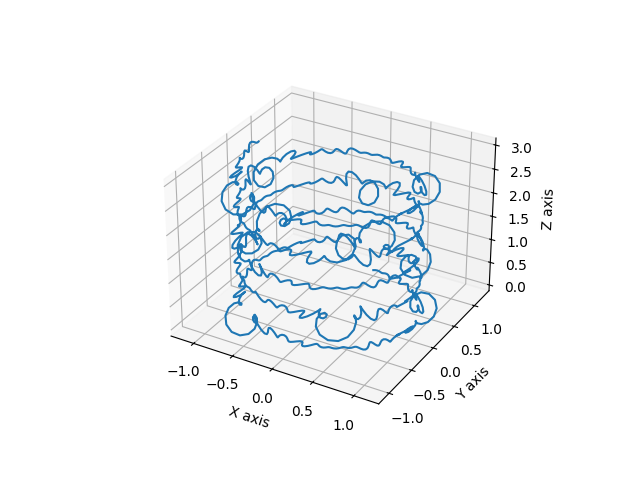

In [2]:
# pip install ipympl   # install in terminal
# you can use it to rotate the plot:
%matplotlib widget

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(x_coord, y_coord, z_coord)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

### Task 2

Approximate the position of the drone using polynomials. 

Use functions: 
- np.polyfit() - which computes the coefficients of polynomial approximation. Check: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
- np.polyval() - which uses these coefficients to obtain the approximating function. Check: https://numpy.org/doc/stable/reference/generated/numpy.polyval.html
- use order of approximation *N = 50*
- all procedures should be included into your function called: *polynomial_approx()*, with proper input and output parameters.  



In [3]:
def polynomial_approx(x, y, order = 50):
    coefficients = np.polyfit(x, y, order)

    # define the moments of time for which the approximating function will be evaluated
    n_points = 1000
    t = np.linspace(0, 150, n_points)
    
    # Compute trajectory of the drone in points specified in t
    values_approx = np.polyval(coefficients, t)
    
    return values_approx, t

- Approximate SEPARATELY x, y and z coordinates using *polynomial_approx()* function (with np.polyfit() and np.polyval() included).
- Plot both the measured data and approximated one. 
- Can you see the smoothing property of approximation process? It is assumed that it should eliminate the measurement error. Generate proper plots. 

C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)


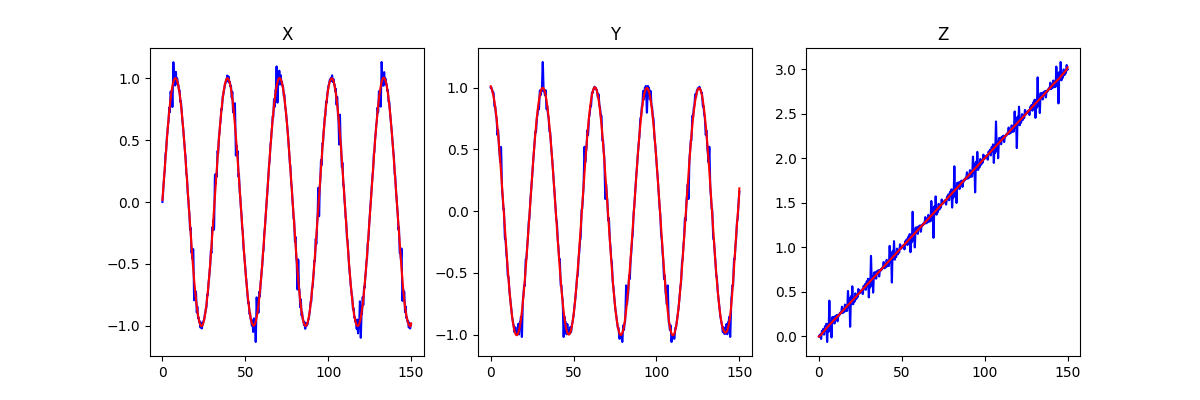

In [4]:
x_approx, t = polynomial_approx(time_vec, x_coord)
y_approx, _ = polynomial_approx(time_vec, y_coord)
z_approx, _ = polynomial_approx(time_vec, z_coord)

_, (plot_x, plot_y, plot_z) = plt.subplots(1, 3, figsize=(12, 4))

plot_x.plot(time_vec, x_coord, color='blue')
plot_x.plot(t, x_approx, color='red')
plot_x.set_title('X')

plot_y.plot(time_vec, y_coord, color='blue')
plot_y.plot(t, y_approx, color='red')
plot_y.set_title('Y')

plot_z.plot(time_vec, z_coord, color='blue')
plot_z.plot(t, z_approx, color='red')
plot_z.set_title('Z')

plt.show()

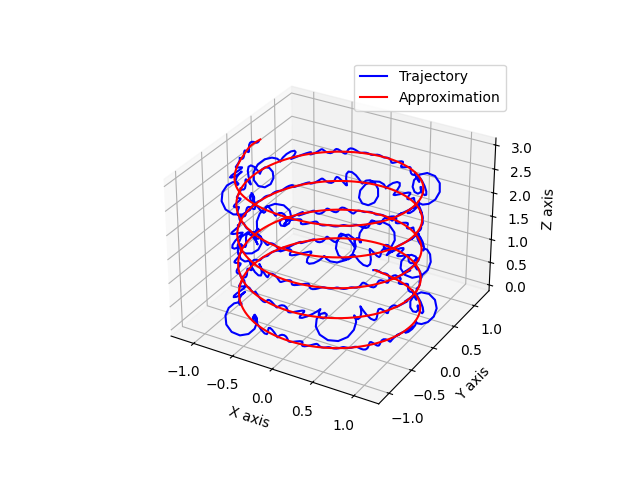

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot3D(x_coord, y_coord, z_coord, color='blue', label='Trajectory')
ax.plot3D(x_approx, y_approx, z_approx, color='red', label='Approximation')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.legend()
plt.show()

### Task 3

The team member responsible for the system tests noticed that for the trajectory with fewer measurement nodes (larger time intervals), the algorithm generates huge errors. Your next task is to find the error and correct the algorithm. Plot the location of the drone (real location and approximation) for the second trajectory.

- load the data (*x_coord2.txt*...)
- plot the trajectory
- approximate it using *polynomial_approx()* function, and order of polynomial *N = 50*.
- what is the root cause of this effect? Write a short explanation with proper plots (in external *.png files). 

In [6]:
x_coord2 = np.loadtxt('x_coord2.txt')
y_coord2 = np.loadtxt('y_coord2.txt')
z_coord2 = np.loadtxt('z_coord2.txt')
time_vec2 = np.loadtxt('time2.txt')

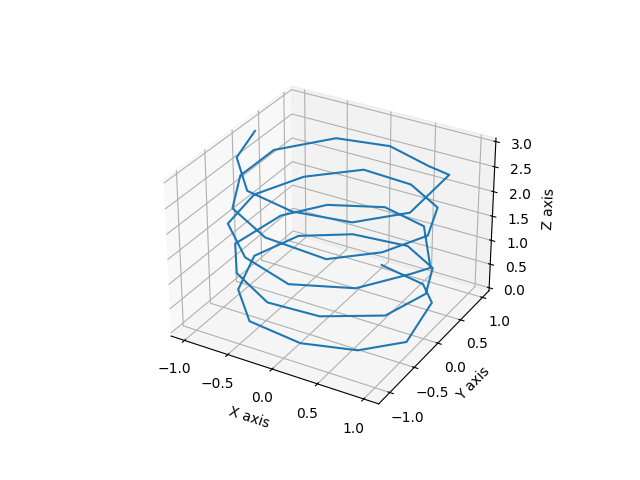

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(x_coord2, y_coord2, z_coord2)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)


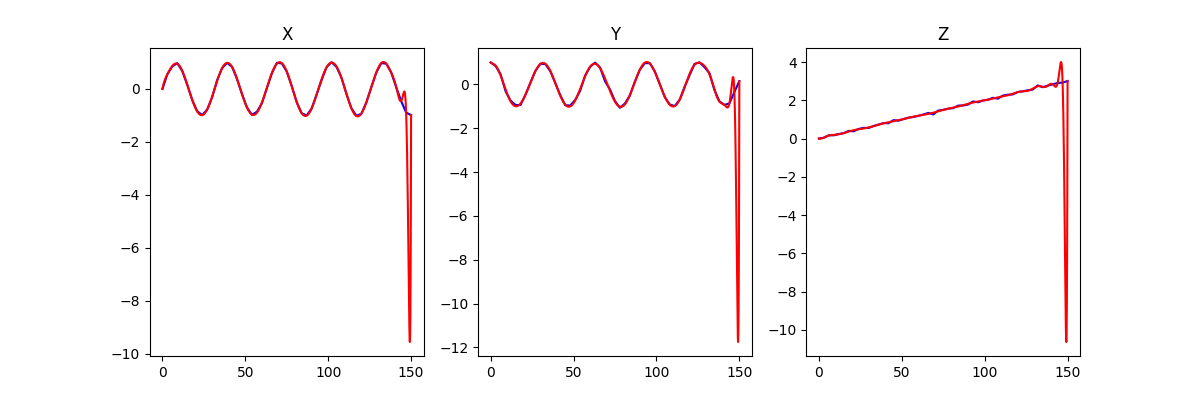

In [8]:
x_approx2, t2 = polynomial_approx(time_vec2, x_coord2)
y_approx2, _ = polynomial_approx(time_vec2, y_coord2)
z_approx2, _ = polynomial_approx(time_vec2, z_coord2)

_, (plot_x, plot_y, plot_z) = plt.subplots(1, 3, figsize=(12, 4))

plot_x.plot(time_vec2, x_coord2, color='blue')
plot_x.plot(t2, x_approx2, color='red')
plot_x.set_title('X')

plot_y.plot(time_vec2, y_coord2, color='blue')
plot_y.plot(t2, y_approx2, color='red')
plot_y.set_title('Y')

plot_z.plot(time_vec2, z_coord2, color='blue')
plot_z.plot(t2, z_approx2, color='red')
plot_z.set_title('Z')

plt.show()

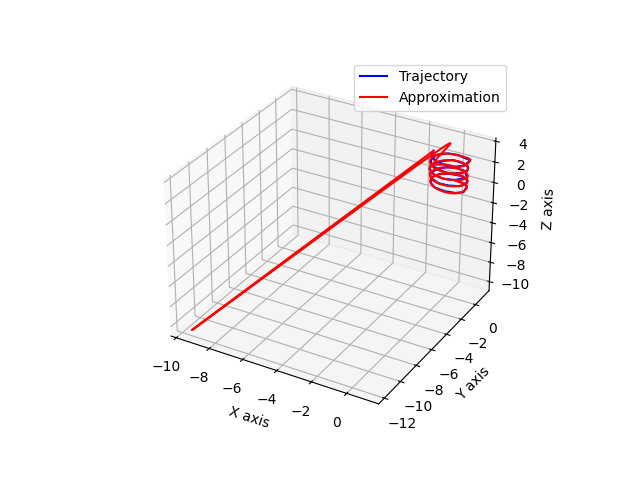

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot3D(x_coord2, y_coord2, z_coord2, color='blue', label='Trajectory')
ax.plot3D(x_approx2, y_approx2, z_approx2, color='red', label='Approximation')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.legend()
plt.show()

We can observe a classic example of **Runge's phenomenon**. The polynomial of degree 50 is too sensitive to changes in our sample of just 50 equispaced points. This leads to large swings at the ends of the interval as the polynomial tries to "force itself" through all the points. The error can be reduced by using a lower-degree polynomial.

##### Let's try a 20-degree polynomial

C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_12964\2694016085.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, order)


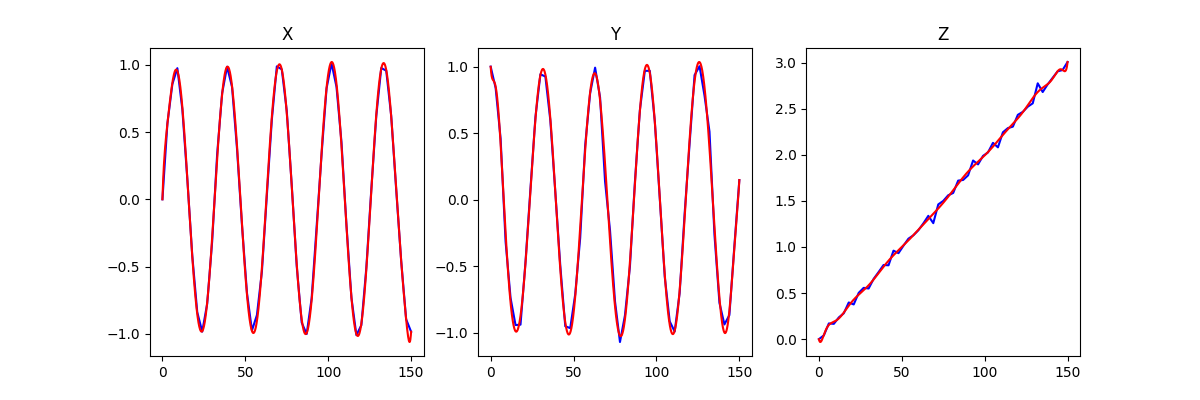

In [10]:
x_approx2, t2 = polynomial_approx(time_vec2, x_coord2, 20)
y_approx2, _ = polynomial_approx(time_vec2, y_coord2, 20)
z_approx2, _ = polynomial_approx(time_vec2, z_coord2, 20)

_, (plot_x, plot_y, plot_z) = plt.subplots(1, 3, figsize=(12, 4))

plot_x.plot(time_vec2, x_coord2, color='blue')
plot_x.plot(t2, x_approx2, color='red')
plot_x.set_title('X')

plot_y.plot(time_vec2, y_coord2, color='blue')
plot_y.plot(t2, y_approx2, color='red')
plot_y.set_title('Y')

plot_z.plot(time_vec2, z_coord2, color='blue')
plot_z.plot(t2, z_approx2, color='red')
plot_z.set_title('Z')

plt.show()

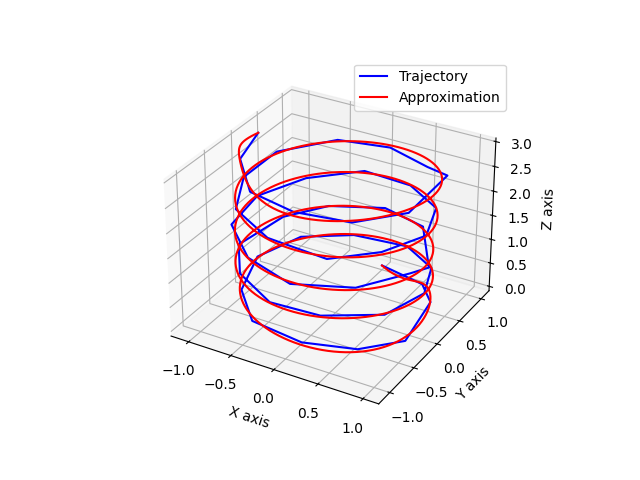

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot3D(x_coord2, y_coord2, z_coord2, color='blue', label='Trajectory')
ax.plot3D(x_approx2, y_approx2, z_approx2, color='red', label='Approximation')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.legend()
plt.show()

The Runge's phenomenon is still observable but to a much smaller extent.

### Task 4

Check whether the trigonometric approximation is resistant to the above effect. Include your comments and observatons. 

In [12]:
def trig_approx(time_vec, coord_vec, N = 50):
    """
    Approximation using trigonometric functions
    """

    time_vec = time_vec / np.max(time_vec) 
    S = np.zeros((N, N))

    for k in range(N):
        for l in range(N):
            for i in range(len(coord_vec)):
                S[k, l] += np.cos((l + 1) * time_vec[i]) * np.cos((k + 1) * time_vec[i])
    
    t = np.zeros(N)
    for k in range(N):
        for i in range(len(coord_vec)):
            t[k] += coord_vec[i] * np.cos((k + 1) * time_vec[i])
    
    c = np.linalg.solve(S, t)
    c1 = np.zeros((N, len(time_vec)))
    
    for i in range(N):
        c1[i, :] = np.cos((i + 1) * time_vec)
    
    x_aprox = np.dot(c1.T, c)

    return x_aprox

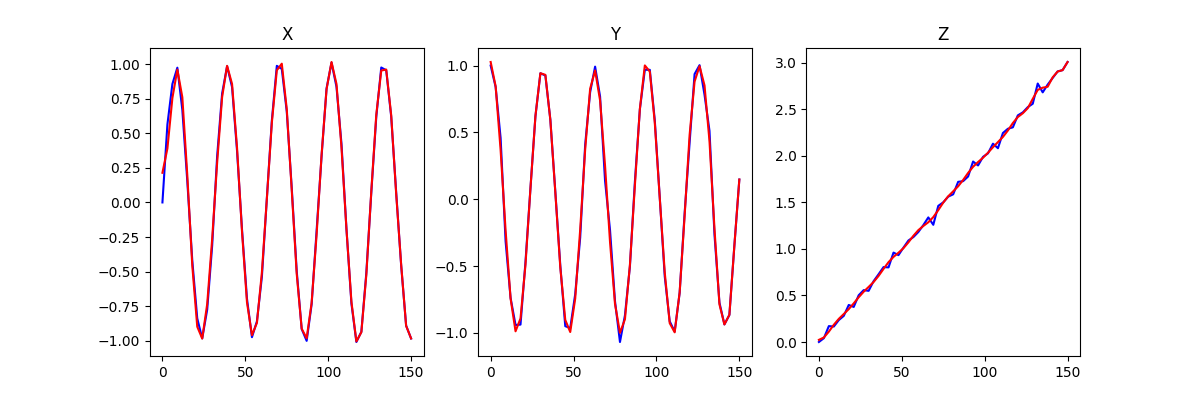

In [13]:
x_approx2 = trig_approx(time_vec2, x_coord2)
y_approx2 = trig_approx(time_vec2, y_coord2)
z_approx2 = trig_approx(time_vec2, z_coord2)

_, (plot_x, plot_y, plot_z) = plt.subplots(1, 3, figsize=(12, 4))

plot_x.plot(time_vec2, x_coord2, color='blue')
plot_x.plot(time_vec2, x_approx2, color='red')
plot_x.set_title('X')

plot_y.plot(time_vec2, y_coord2, color='blue')
plot_y.plot(time_vec2, y_approx2, color='red')
plot_y.set_title('Y')

plot_z.plot(time_vec2, z_coord2, color='blue')
plot_z.plot(time_vec2, z_approx2, color='red')
plot_z.set_title('Z')

plt.show()

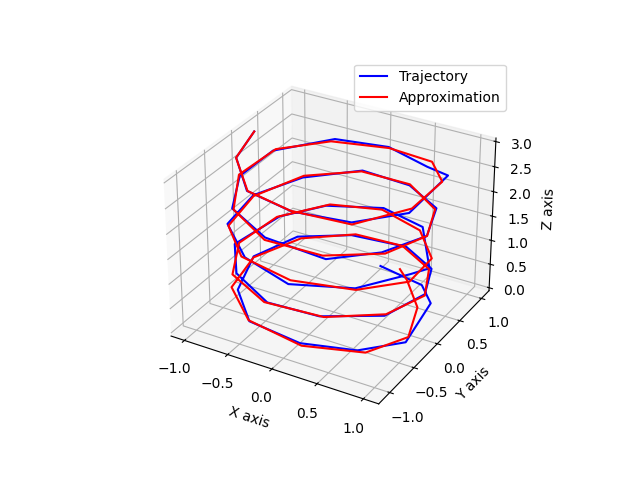

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot3D(x_coord2, y_coord2, z_coord2, color='blue', label='Trajectory')
ax.plot3D(x_approx2, y_approx2, z_approx2, color='red', label='Approximation')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.legend()
plt.show()

Trigonometric approximation does not suffer from Runge's phenomenon, making it more suitable for smaller samples. 